In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [2]:
(X_train, y_train),(X_test, y_test)=keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
import matplotlib.pyplot as plt

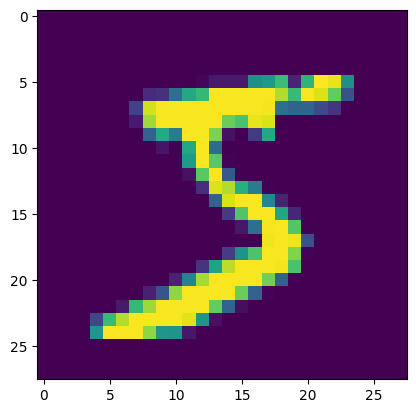

In [8]:
plt.imshow(X_train[0])

In [9]:
y_train[0]

5

In [10]:
#dividing X_train and X_test by 255 as 255 is the largest value and smallest value is 0
#dividing by 255 will scale all the values between 0 and 1
X_train=X_train/255
X_test=X_test/255

In [11]:
#building the neural network
model=Sequential()
model.add(Flatten(input_shape=(28,28))) #converting 2d data to 1d data
model.add(Dense(128, activation='relu')) #input layer
model.add(Dense(32, activation='relu')) #hidden layer
model.add(Dense(10, activation='softmax')) #output layer

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0072 - accuracy: 0.9976 - val_loss: 0.1603 - val_accuracy: 0.9763
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.1677 - val_accuracy: 0.9758
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.1828 - val_accuracy: 0.9754
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.1652 - val_accuracy: 0.9770
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.1925 - val_accuracy: 0.9726
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.1674 - val_accuracy: 0.9778
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.1584 - val_accuracy

In [16]:
y_prob = model.predict(X_test) # we get an array of probabilities of each number

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred = y_prob.argmax(axis=1) # we find the number with the highest probability and that is our predicted value

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9786

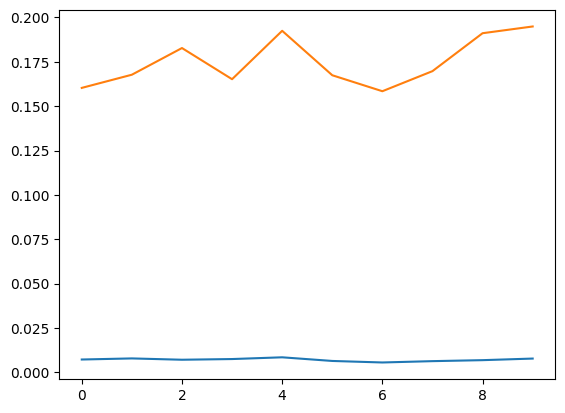

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

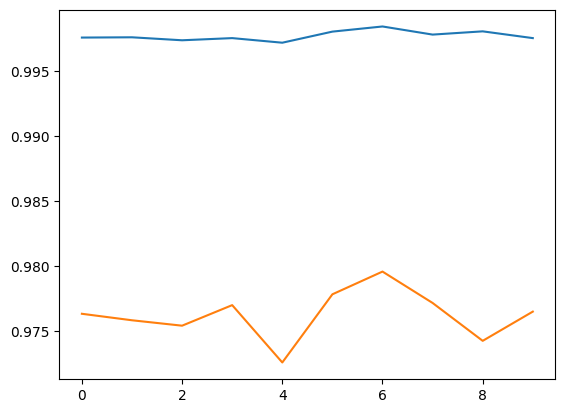

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

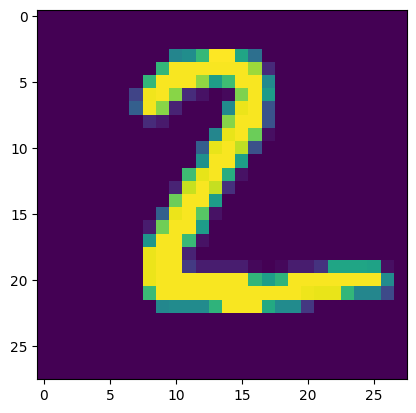

In [21]:
plt.imshow(X_test[1])

In [22]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 22ms/step


array([2], dtype=int64)